In [23]:

from sklearn import *
import sklearn
import joblib

import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt 
from collections import Counter
import numpy as np
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from keras.models import Sequential ##form our layers 
from keras.layers import Dense, Dropout## this helps us with overfitting
from mlxtend.plotting import plot_confusion_matrix
import streamlit as st
from sklearn.preprocessing import StandardScaler





In [3]:
###How profitable is a startup based on Research, Marketing and Administration. 
###Would I get the same profit investing in New York, Florida or California?  
###How much are you willing to spend in a company? 
###How much profit would I get?
###How much should I spend in Research, Administration and Marketing? 
### Is a good idea to spend 10.000 dollars in Marketing to get a higher profit? 
###This project aims to train and test a model to develop an app which can predict future profit. 

## load data set
data =pd.read_csv("50_Startups.csv")
df= pd.DataFrame(data)
print(df)


    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [128]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,AgeBin,pBin,mBin,rBin
0,165349.20,136897.80,471784.10,New York,192261.83,"(100000, 200000]","(400000, 500000]","(400000, 500000]","(100000, 200000]"
1,162597.70,151377.59,443898.53,California,191792.06,"(100000, 200000]","(400000, 500000]","(400000, 500000]","(100000, 200000]"
2,153441.51,101145.55,407934.54,Florida,191050.39,"(100000, 200000]","(400000, 500000]","(400000, 500000]","(100000, 200000]"
3,144372.41,118671.85,383199.62,New York,182901.99,"(100000, 200000]","(200000, 400000]","(200000, 400000]","(100000, 200000]"
4,142107.34,91391.77,366168.42,Florida,166187.94,"(100000, 200000]","(200000, 400000]","(200000, 400000]","(100000, 200000]"


In [4]:
df.rename(columns={'Marketing Spend': 'Marketing_Spend', 'R&D Spend': 'R_D_Spend'}, inplace=True)

In [120]:
df.head(3)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [124]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
#df.cols={'Marketing Spend', 'R&D Spend','State', 'Profit', 'Administration' }
#df.columns=df.cols

In [131]:
df.s={"California":0,
    "Florida":1,
    "New York":2}

C:\Users\brill\AppData\Local\Temp\ipykernel_11084\1060789429.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.s={"California":0,


In [132]:
df['State1']=df["State"].map(df.s)

In [134]:
df.head(3)

,R&D_Spend,Administration,Marketing_Spend,State,Profit,State1
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1


In [ ]:
##from sklearn.preprocessing import OneHotEncoder
##from sklearn.compose import ColumnTransformer

##categorical_features=['Profit', 'R&D_Spend']
##one_hot = OneHotEncoder()
##transformer = ColumnTransformer([('one_hot',
##                                   one_hot,categorical_features)]
##                                   remainder="passthrough")
##transformed_df = transformer.fit_transform(x)
##transformed_df

In [ ]:
# Create dummy variables for the catgeorical variable State
#df['C']=np.where(df['State']=='California',1,0)
#df['F']=np.where(df['State']=='Florida',1,0)
#df['N']=np.where(df['State']=='New York',1,0)

In [ ]:
#Dropping column State
#df.drop('State',axis='columns',inplace=True)

In [11]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [81]:
df["Profit"].min()

14681.4

In [82]:

df["Administration"].min()

51283.14

In [83]:
df["Profit"].max()

192261.83

In [84]:
df["Administration"].max()


182645.56

In [89]:
df["Marketing_Spend"].min()

0.0

In [91]:
df["Marketing_Spend"].max()

471784.1

In [92]:
df["R&D_Spend"].min()

0.0

In [93]:
df["R&D_Spend"].max()

165349.2

In [14]:
df["Profit"] == 14681.4 ##rows

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
Name: Profit, dtype: bool

In [15]:
df.loc[df["Profit"] == 14681.4]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [16]:
df["Profit"] == df['Profit'].min()##to check rows

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
Name: Profit, dtype: bool

In [17]:
df.loc[df["Profit"] == df["Profit"].min()]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [18]:
df['Profit'].idxmin()###index

49

In [4]:
####EXPLORATORY DATA ANALYSIS 
## Count- Number of observation/samples in each column, if not consistent- it means the dataset has something wrong.
##Mean- Average of each column of the dataset.
##Std/Standard Deviation- How widespread data points/observation values are from the data’s mean.

df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
##unique values in order 
def check_type(dataframe):
    nunique_df= pd.DataFrame({'Variables': dataframe.columns,
                              'Types': [dataframe[i].nunique() \
                                        for i in dataframe.columns]})
    nunique_df=nunique_df.sort_values('Types',ascending=False)
    nunique_df=nunique_df.reset_index(drop=True)
    return nunique_df

check_type(df)

,Variables,Types
0,Administration,50
1,Profit,50
2,R&D Spend,49
3,Marketing Spend,48
4,State,3


In [7]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
df.shape

(50, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
###Checking if the data is imbalanced
df['Profit'].value_counts()

192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: Profit, dtype: int64

In [13]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [15]:
print('There are',df.duplicated().sum(),'duplicate values in the dateset.')

There are 0 duplicate values in the dateset.


In [17]:
##No Null Values 
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [132]:
df.groupby(['Profit'])['Marketing Spend'].value_counts()

Profit     Marketing Spend
14681.40   45173.06           1
35673.41   0.00               1
42559.73   0.00               1
49490.75   297114.46          1
64926.08   1903.93            1
65200.33   28334.72           1
69758.98   35534.17           1
71498.49   148001.11          1
77798.83   164470.71          1
78239.91   172795.67          1
81005.76   174999.30          1
81229.06   185265.10          1
89949.14   197029.42          1
90708.19   201126.82          1
96479.51   205517.64          1
96712.80   210797.67          1
96778.92   214634.81          1
97427.84   46085.25           1
97483.56   88218.23           1
99937.59   91131.24           1
101004.64  107138.38          1
103282.38  118148.20          1
105008.31  353183.81          1
105733.54  134050.07          1
107404.34  137962.62          1
108552.04  140574.81          1
108733.99  304768.73          1
110352.25  303319.26          1
111313.02  299737.29          1
118474.03  298664.47          1
122776.86  0.

In [133]:
df.groupby(['Profit'])['R&D Spend'].value_counts()

Profit     R&D Spend
14681.40   0.00         1
35673.41   542.05       1
42559.73   0.00         1
49490.75   1315.46      1
64926.08   1000.23      1
65200.33   22177.74     1
69758.98   15505.73     1
71498.49   23640.93     1
77798.83   27892.92     1
78239.91   28754.33     1
81005.76   38558.51     1
81229.06   20229.59     1
89949.14   44069.95     1
90708.19   28663.76     1
96479.51   46014.02     1
96712.80   46426.07     1
96778.92   55493.95     1
97427.84   63408.86     1
97483.56   61136.38     1
99937.59   61994.48     1
101004.64  65605.48     1
103282.38  66051.52     1
105008.31  72107.60     1
105733.54  75328.87     1
107404.34  64664.71     1
108552.04  77044.01     1
108733.99  67532.53     1
110352.25  73994.56     1
111313.02  78389.47     1
118474.03  76253.86     1
122776.86  86419.70     1
124266.90  91749.16     1
125370.37  94657.16     1
126992.93  78013.11     1
129917.04  114523.61    1
132602.65  119943.24    1
134307.35  91992.39     1
141585.52  93863.

C:\Users\brill\AppData\Local\Temp\ipykernel_11084\3363701876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Profit"])


<AxesSubplot: xlabel='Profit', ylabel='Density'>

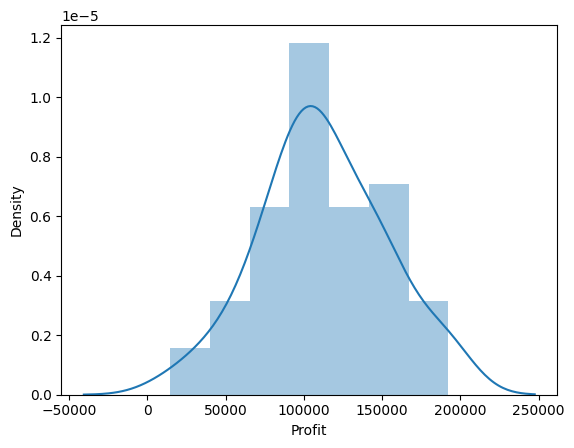

In [5]:
###VISUALIZE THE DATA 
sns.distplot(df["Profit"])

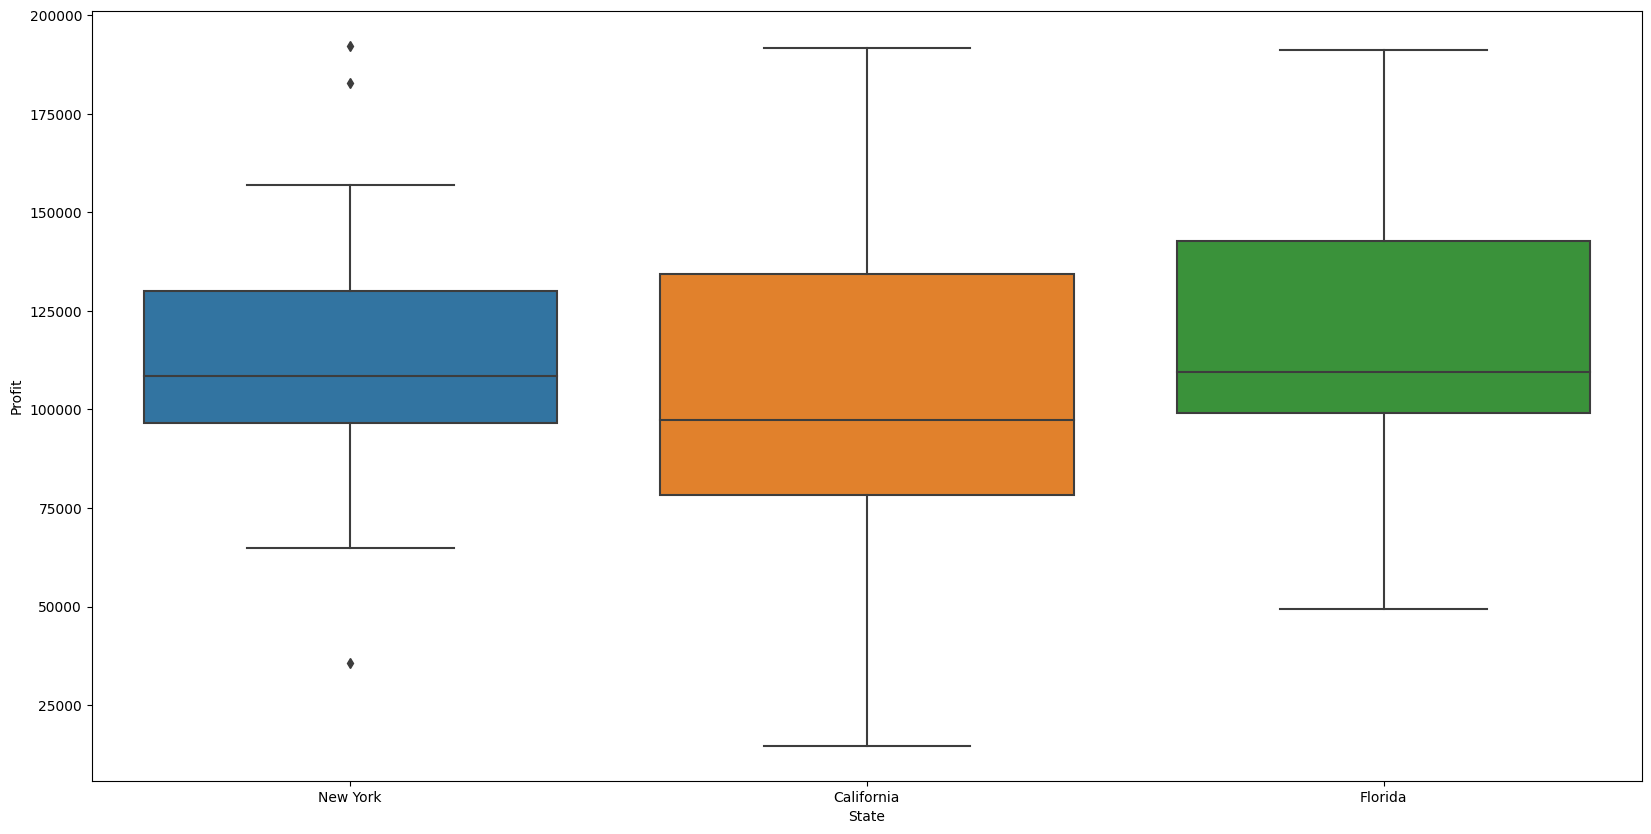

In [30]:
#plt.figure(figsize=(20, 20))
sns.boxplot(x='State',y='Profit',data=df,)
plt.rcParams['figure.figsize'] = [20,10]


In [ ]:
#plt.figure(figsize=(10,8))
#sns.scatterplot(x= df["Profit"], y= df["Marketing Spend"], hue= df['State'])

In [ ]:
#plt.figure(figsize=(10,8))
#sns.scatterplot(x= df["Profit"], y= df["Administration"], hue= df['State'])


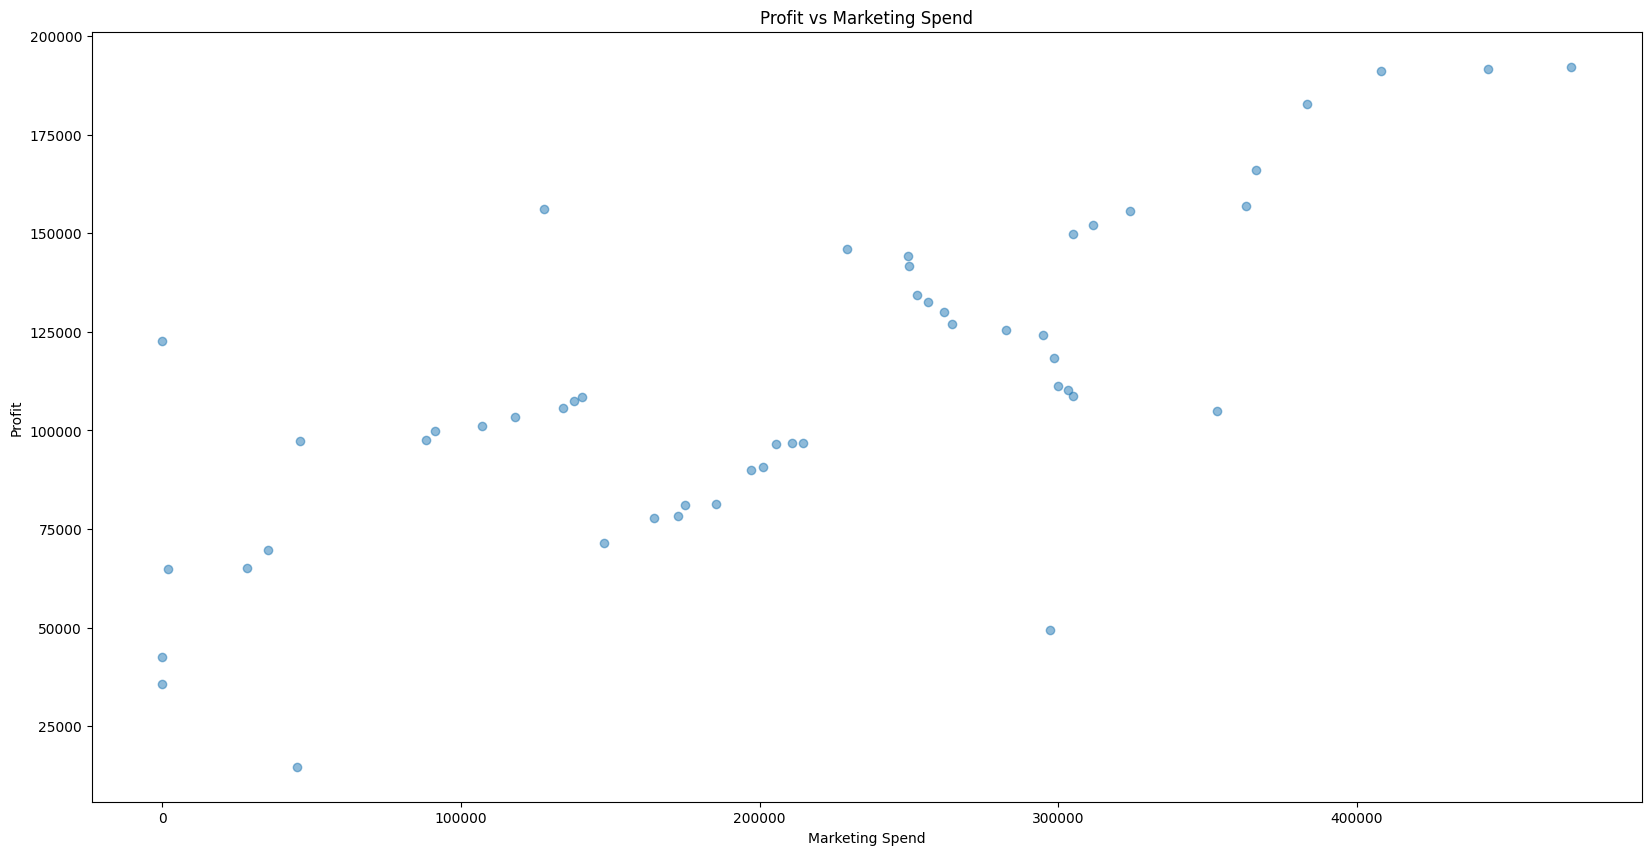

In [111]:
plt.scatter(df['Marketing Spend'],df['Profit'],alpha=0.5)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Profit vs Marketing Spend')
plt.show()



<Figure size 1000x800 with 0 Axes>

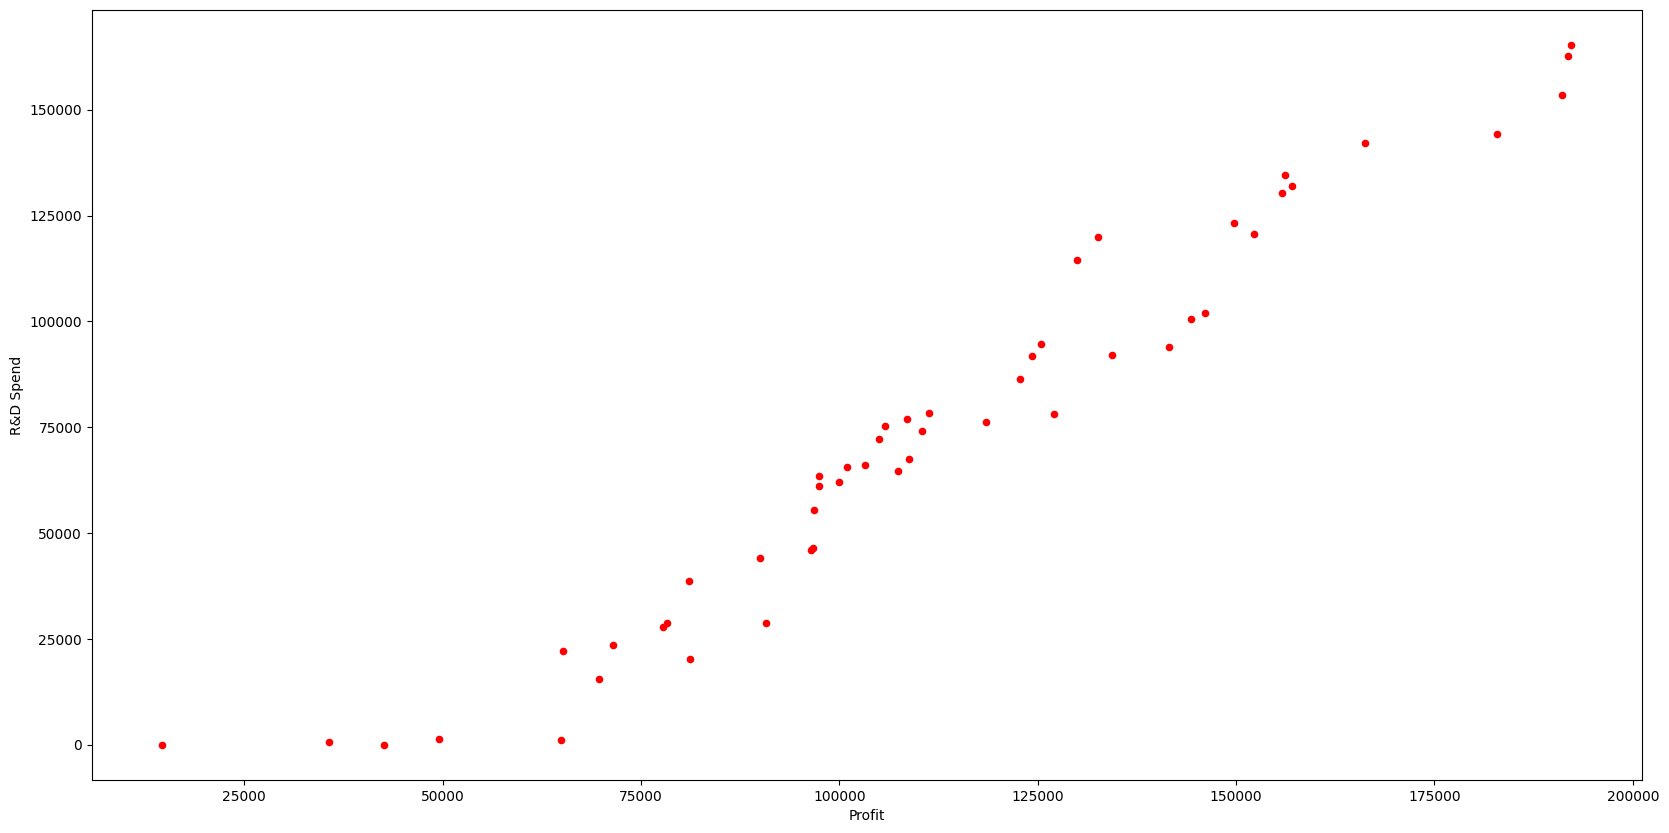

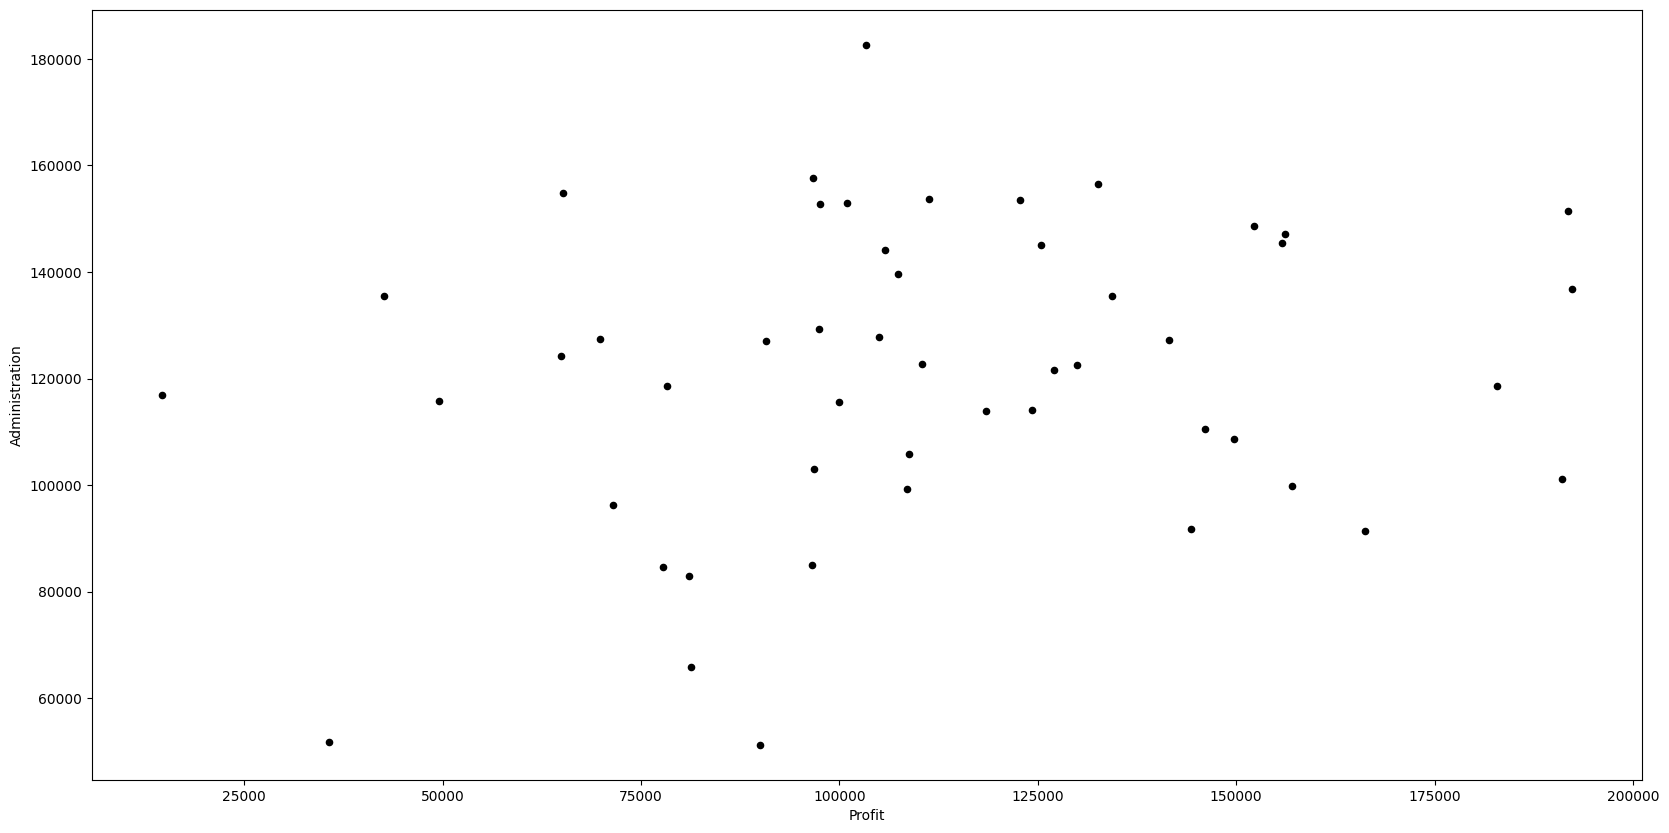

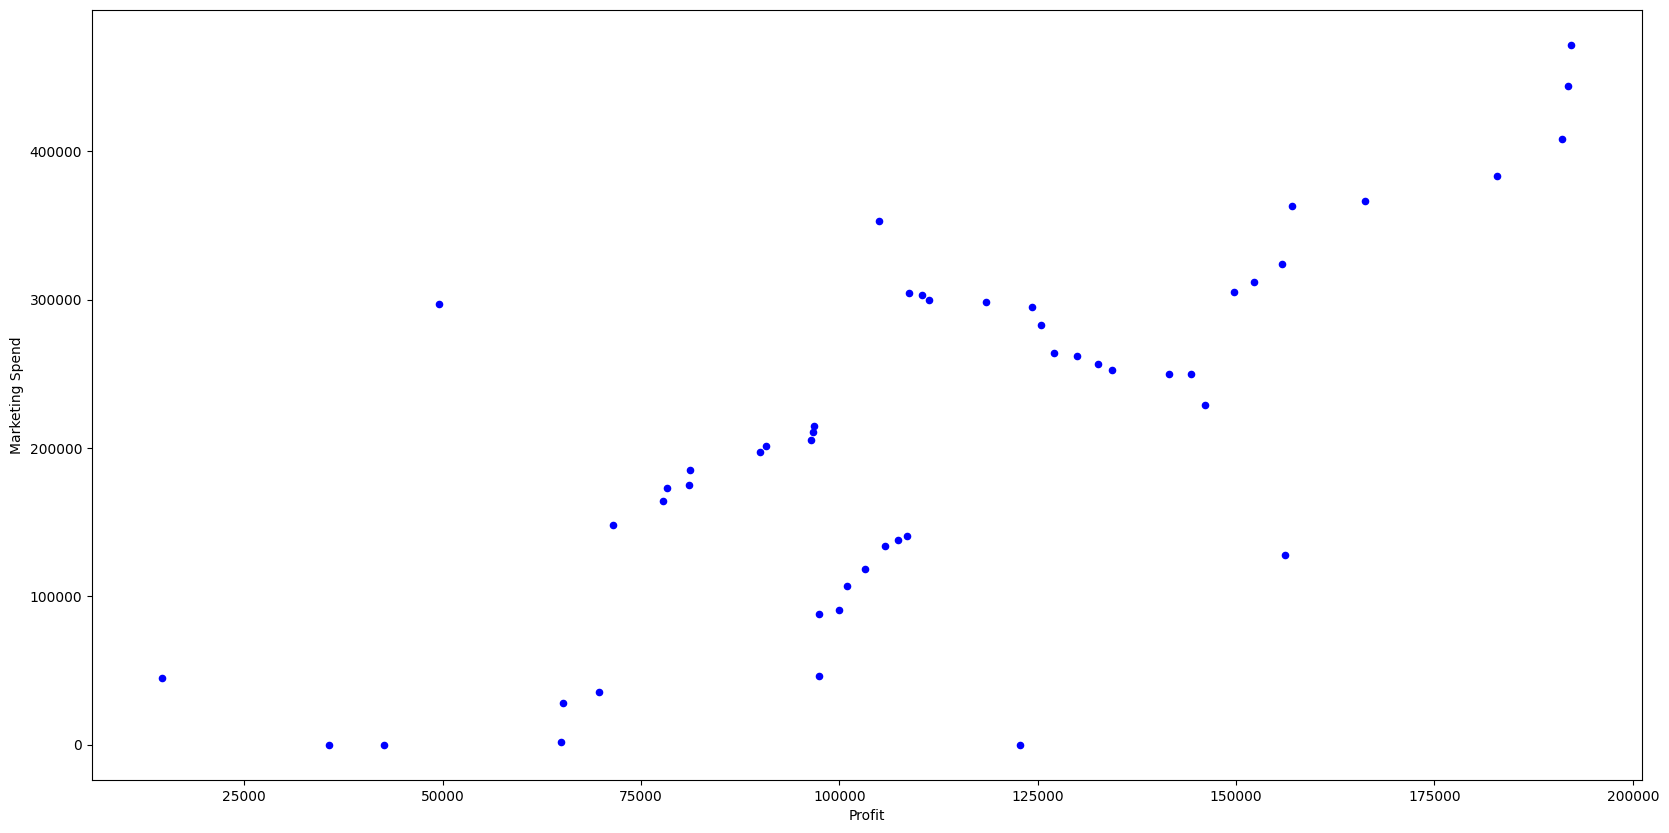

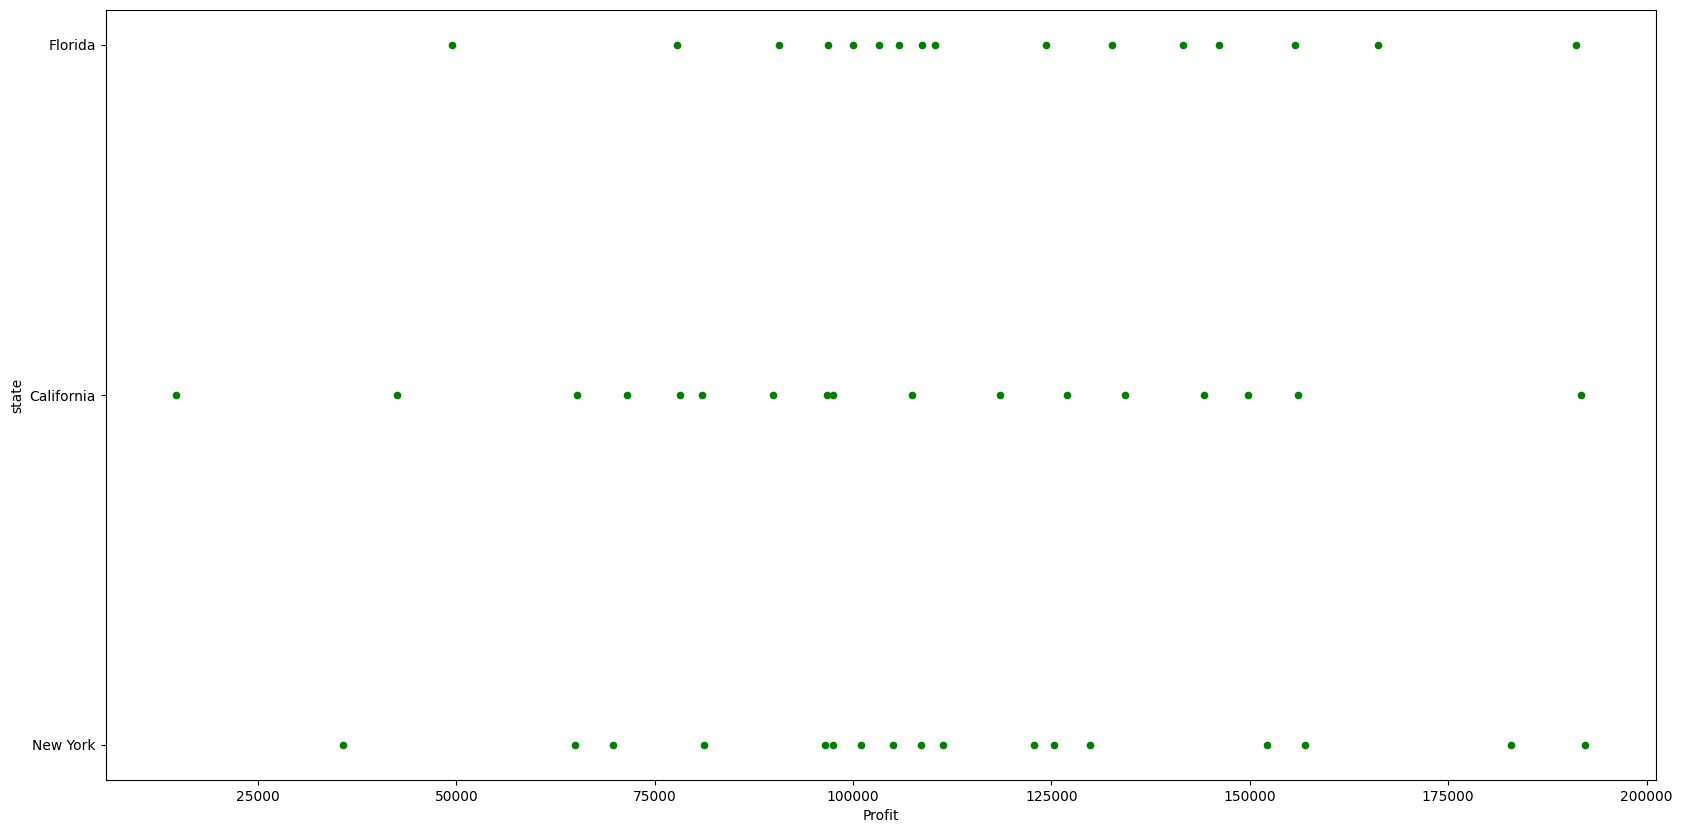

In [85]:

df.plot(kind='scatter', x= 'Profit', y='R&D Spend', color='red')
plt.xlabel('Profit')
plt.ylabel('R&D Spend')
plt.show()


df.plot(kind='scatter', x= 'Profit', y= 'Administration', color='Black')
plt.xlabel('Profit')
plt.ylabel('Administration')
plt.show()

df.plot(kind='scatter', x= 'Profit', y= 'Marketing Spend', color='blue')
plt.xlabel('Profit')
plt.ylabel('Marketing Spend')
plt.show()

df.plot(kind='scatter', x='Profit', y= 'State', color = 'green')
plt.xlabel('Profit')
plt.ylabel('state')

plt.show()

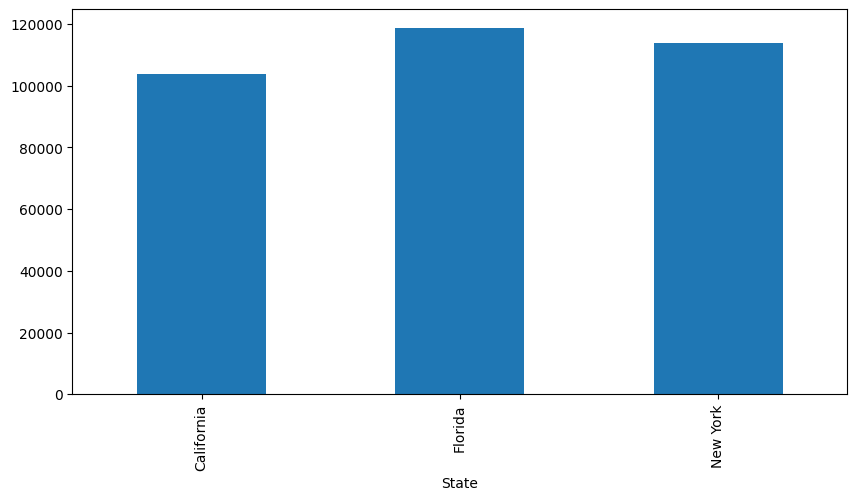

In [76]:
plt.figure(figsize=(10,5))
x= df.groupby('State').mean()['Profit']
x.plot.bar()
plt.show()

C:\Users\brill\AppData\Local\Temp\ipykernel_2984\2663554200.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x= df.groupby('R&D Spend').mean()['Profit']


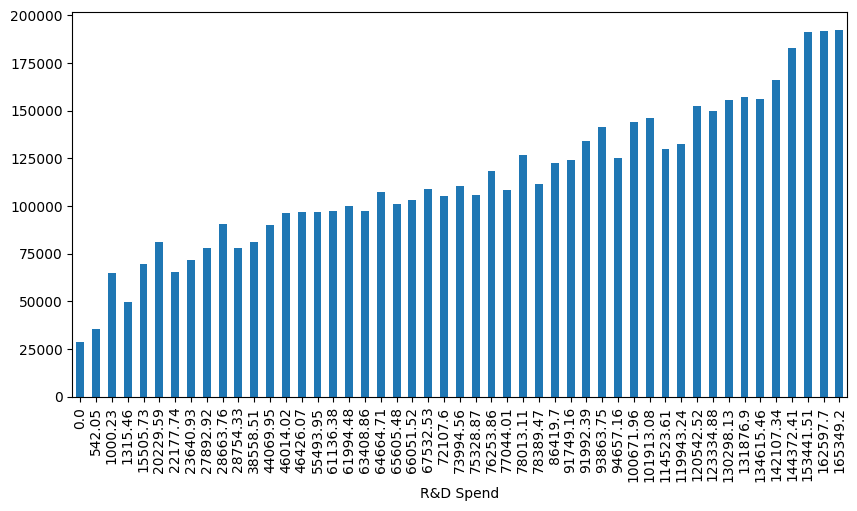

In [77]:
plt.figure(figsize=(10,5))
x= df.groupby('R&D Spend').mean()['Profit']
x.plot.bar()
plt.show()

C:\Users\brill\AppData\Local\Temp\ipykernel_2984\594717084.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x= df.groupby('Marketing Spend').mean()['Profit']


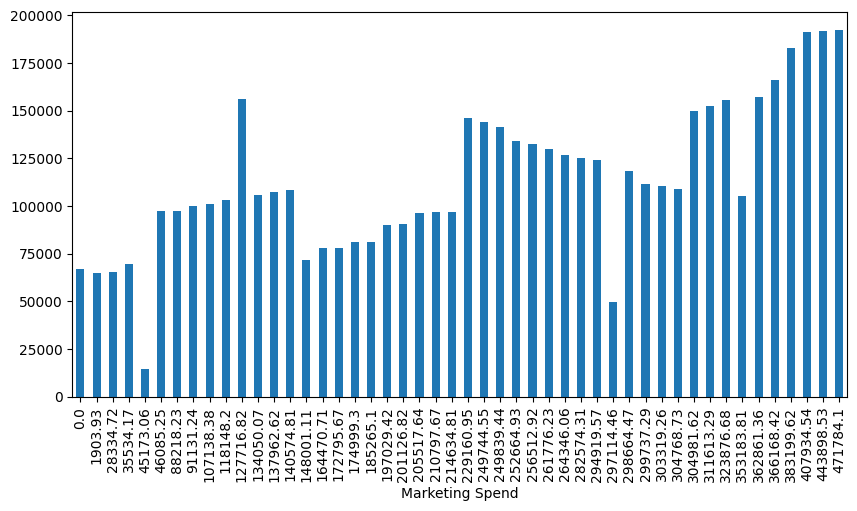

In [78]:
plt.figure(figsize=(10,5))
x= df.groupby('Marketing Spend').mean()['Profit']
x.plot.bar()
plt.show()

C:\Users\brill\AppData\Local\Temp\ipykernel_2984\241257666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x= df.groupby('Administration').mean()['Profit']


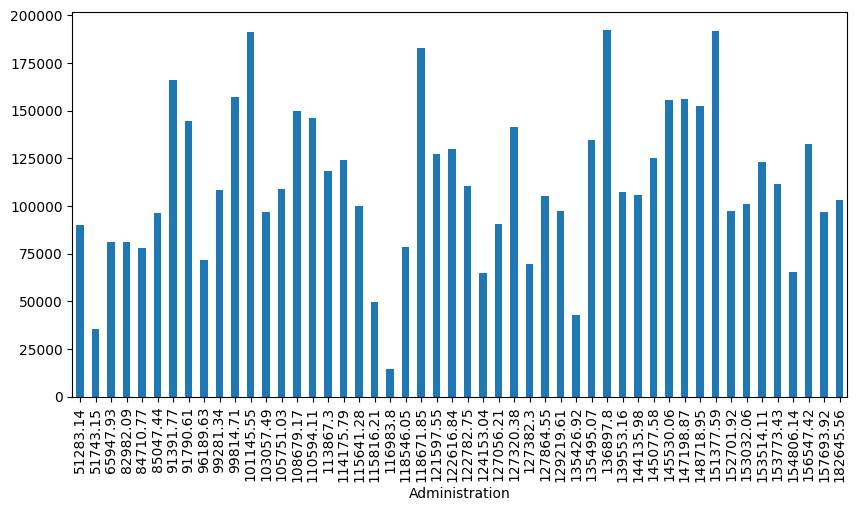

In [79]:
plt.figure(figsize=(10,5))
x= df.groupby('Administration').mean()['Profit']
x.plot.bar()
plt.show()

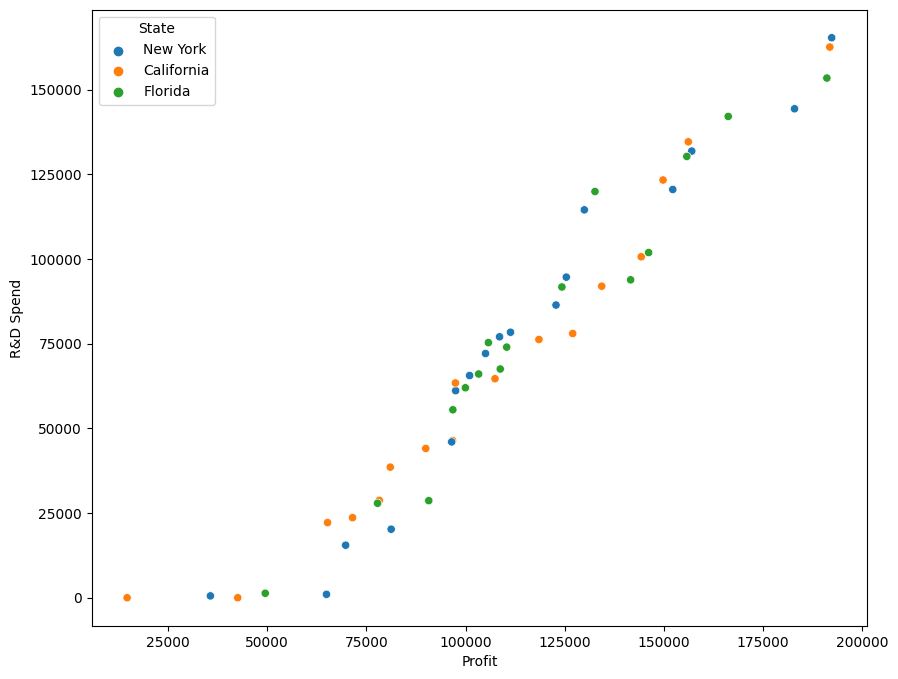

In [80]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,
               x= 'Profit',
               y= 'R&D Spend',
               hue= 'State')
plt.show()

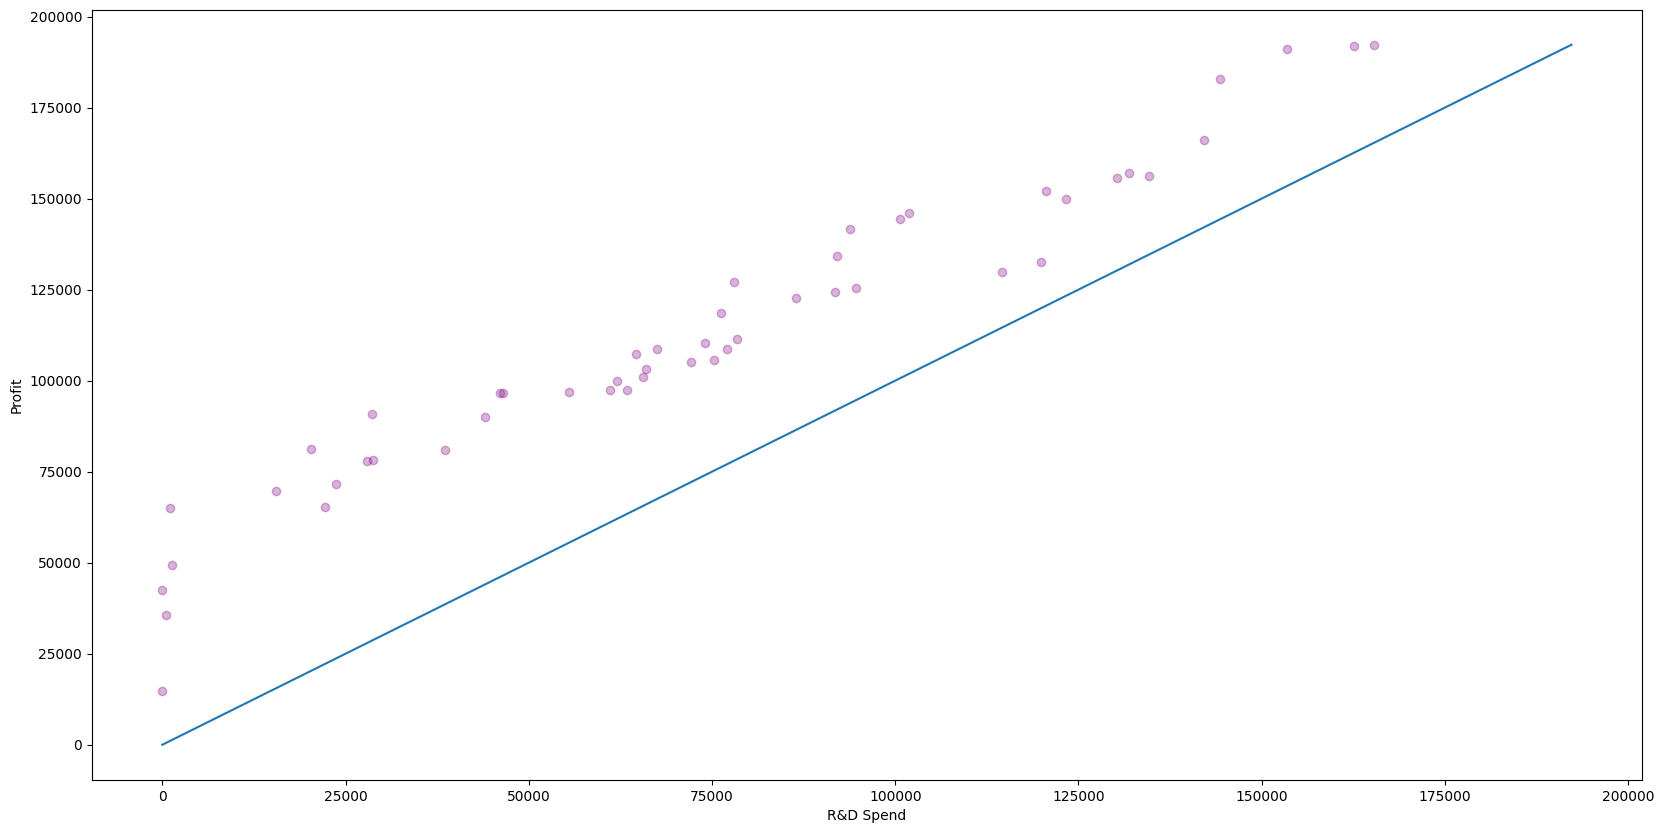

In [88]:
myMax=max(max(df['R&D Spend']), max(df['Profit']))
plt.scatter(df['R&D Spend'], df['Profit'],  color = "purple", alpha=0.3)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.plot([0,myMax], [0,myMax])

plt.show()

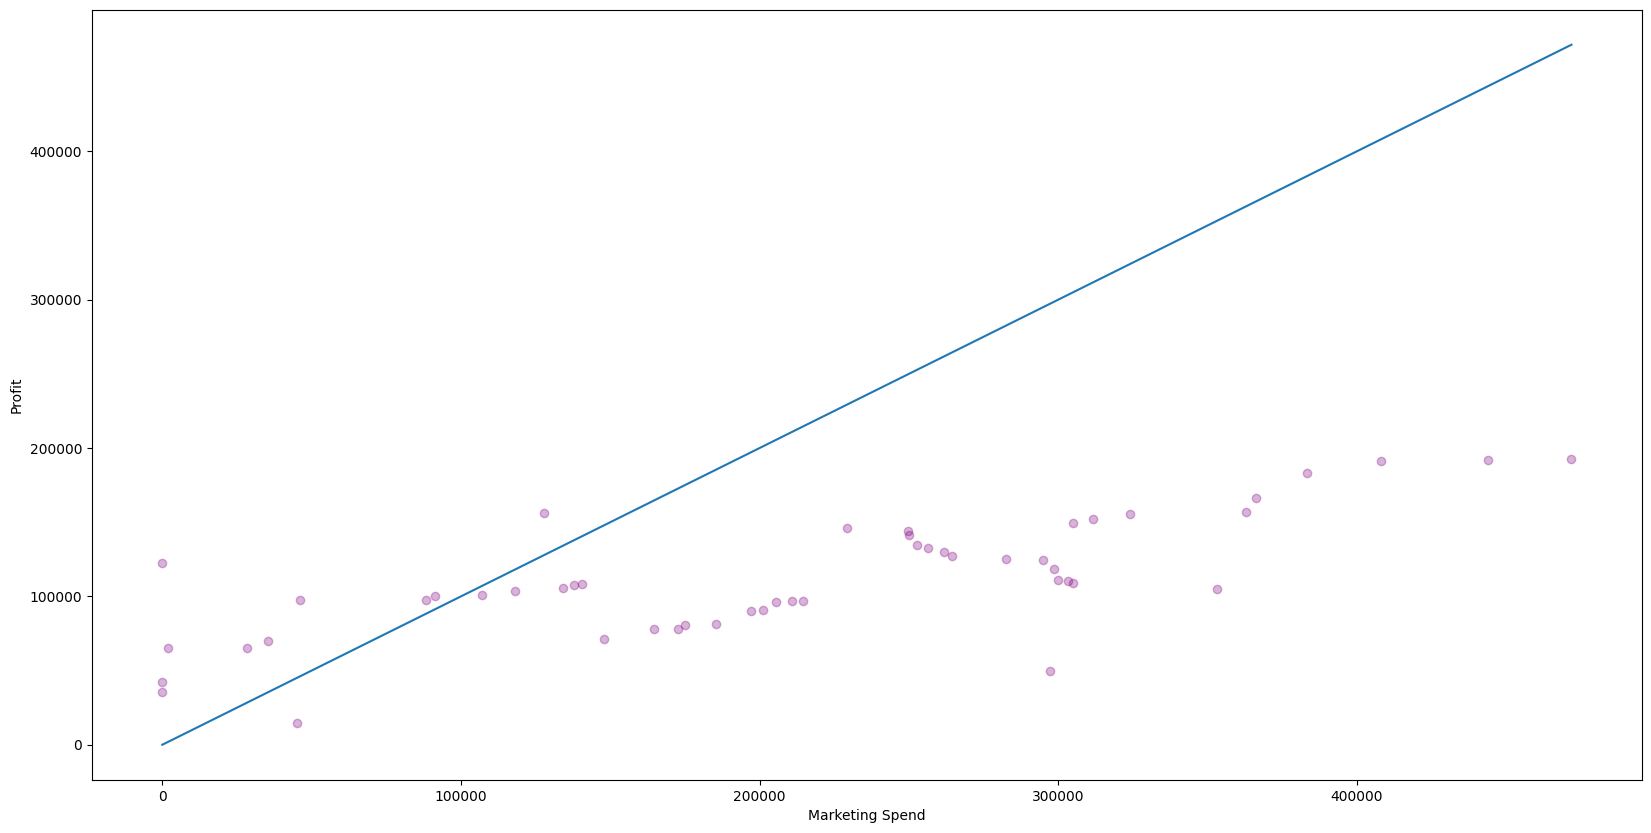

In [90]:
myMax=max(max(df['Marketing Spend']), max(df['Profit']))
plt.scatter(df['Marketing Spend'], df['Profit'],  color = "purple", alpha=0.3)
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.plot([0,myMax], [0,myMax])

plt.show()

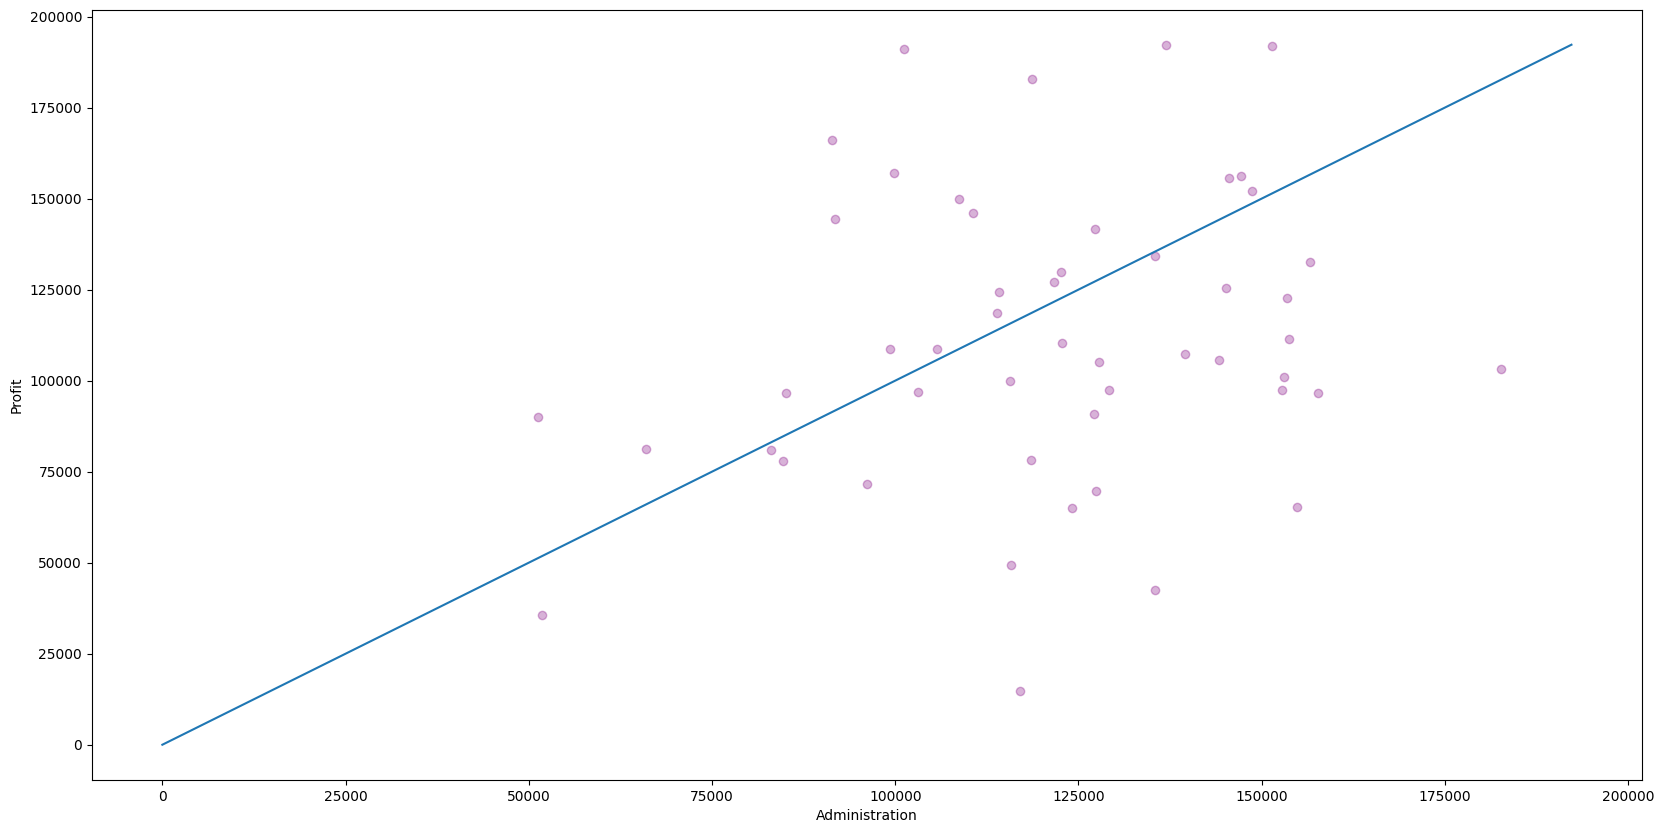

In [91]:
myMax=max(max(df['Administration']), max(df['Profit']))
plt.scatter(df['Administration'], df['Profit'],  color = "purple", alpha=0.3)
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.plot([0,myMax], [0,myMax])

plt.show()

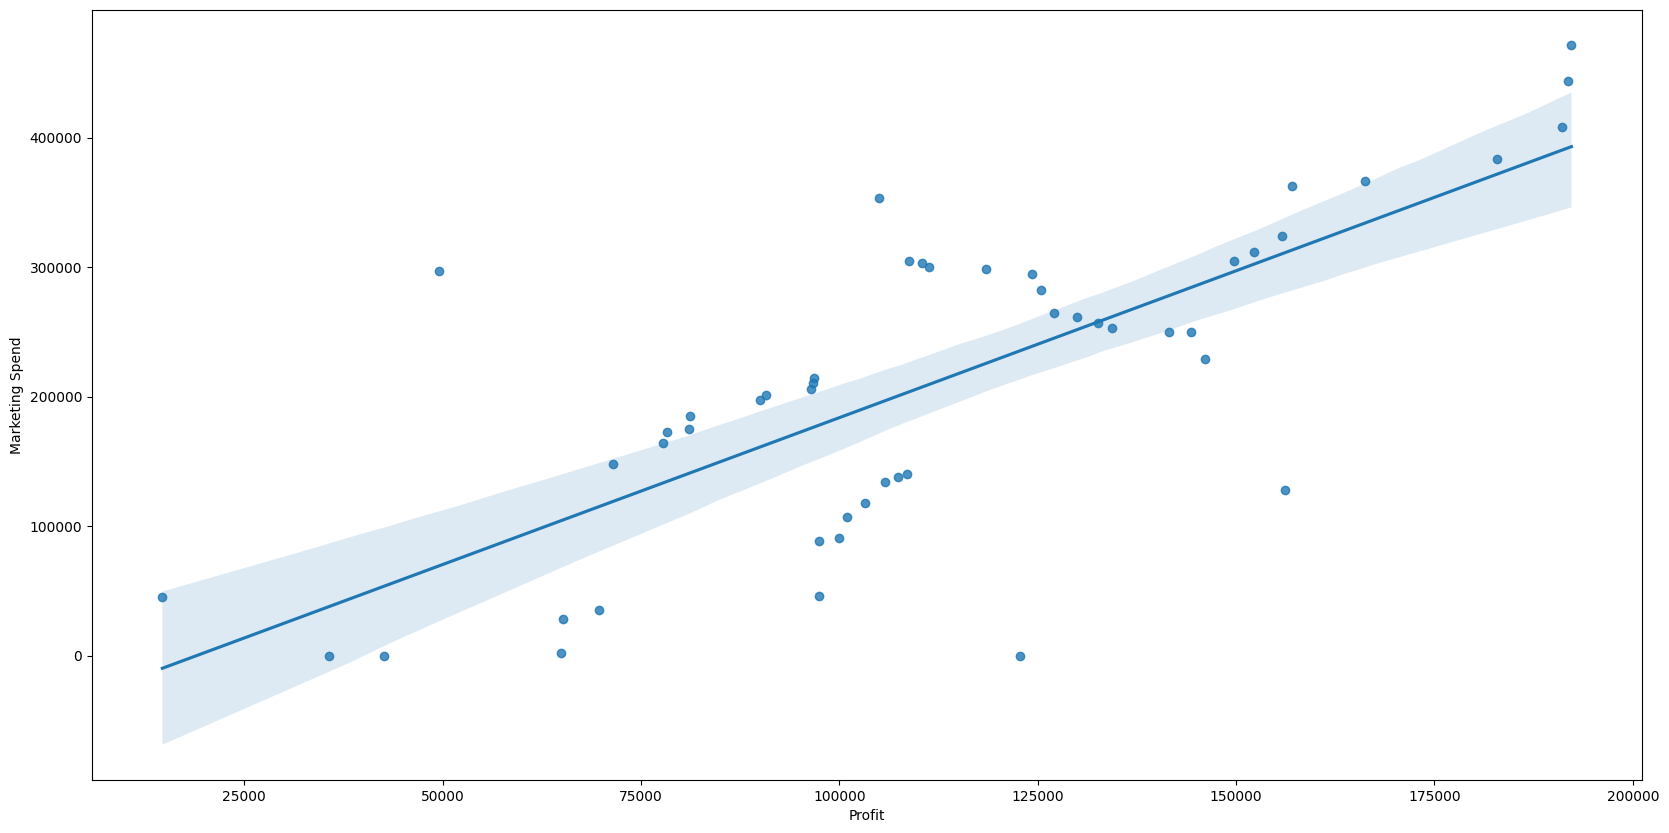

In [98]:
sns.regplot(x='Profit', y = 'Marketing Spend', data=df)
plt.show()

<AxesSubplot: ylabel='State'>

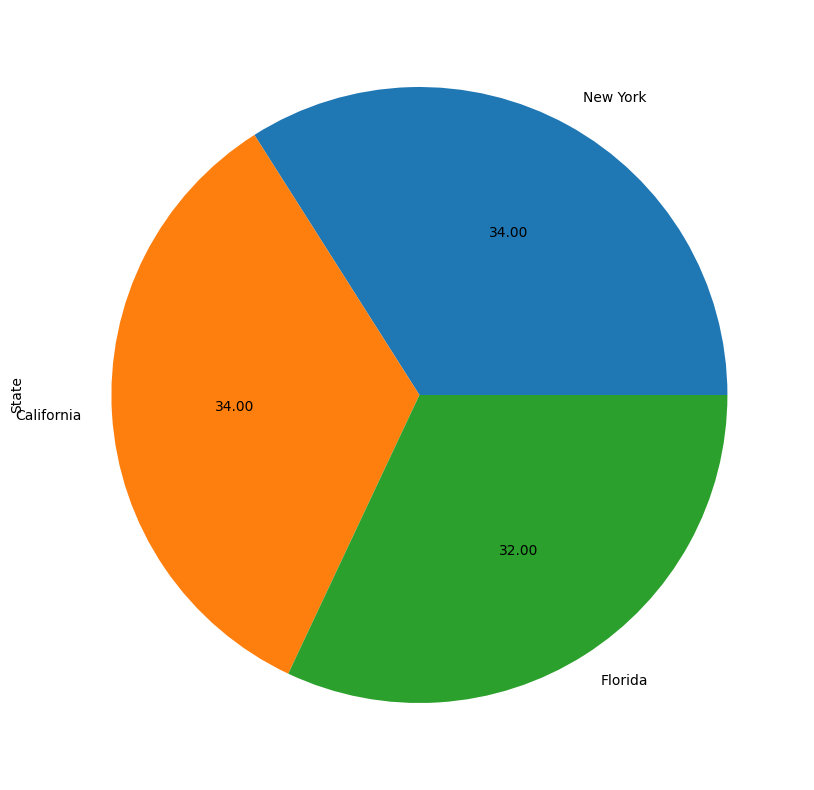

In [110]:
df['State'].value_counts().plot.pie(autopct='%.2f')

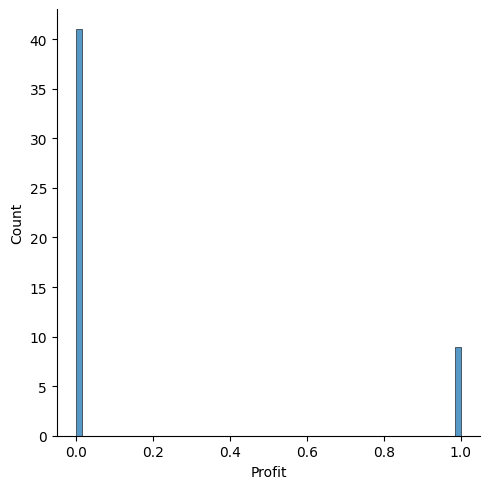

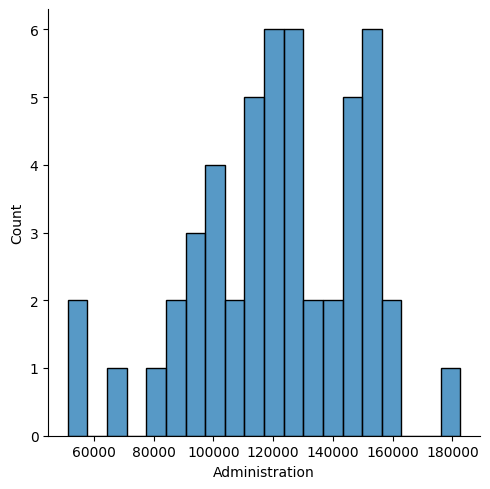

In [171]:
sns.displot(df['Profit'],bins=70,kde=False)



sns.displot(df['Administration'],bins=20,kde=False)

In [19]:
bins = [0, 10000, 50000, 100000, 150000,195000]
df['pBin'] = pd.cut(df['Profit'],bins)

<AxesSubplot: >

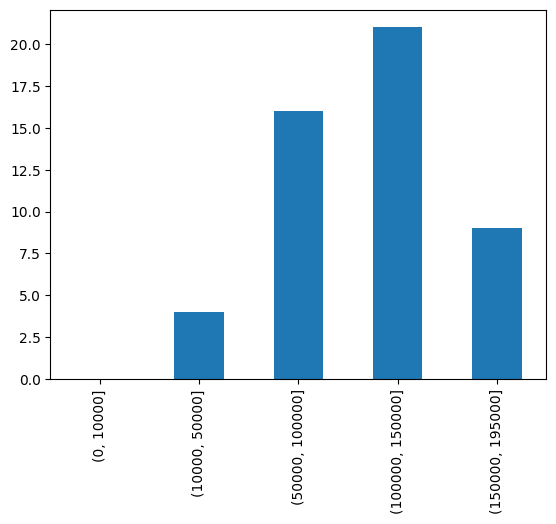

In [20]:
df['pBin'].value_counts().sort_index().plot(kind='bar')

In [120]:
bins = [0, 10000, 50000, 100000, 200000, 400000, 500000]
df['mBin'] = pd.cut(df['Marketing Spend'],bins)

<AxesSubplot: >

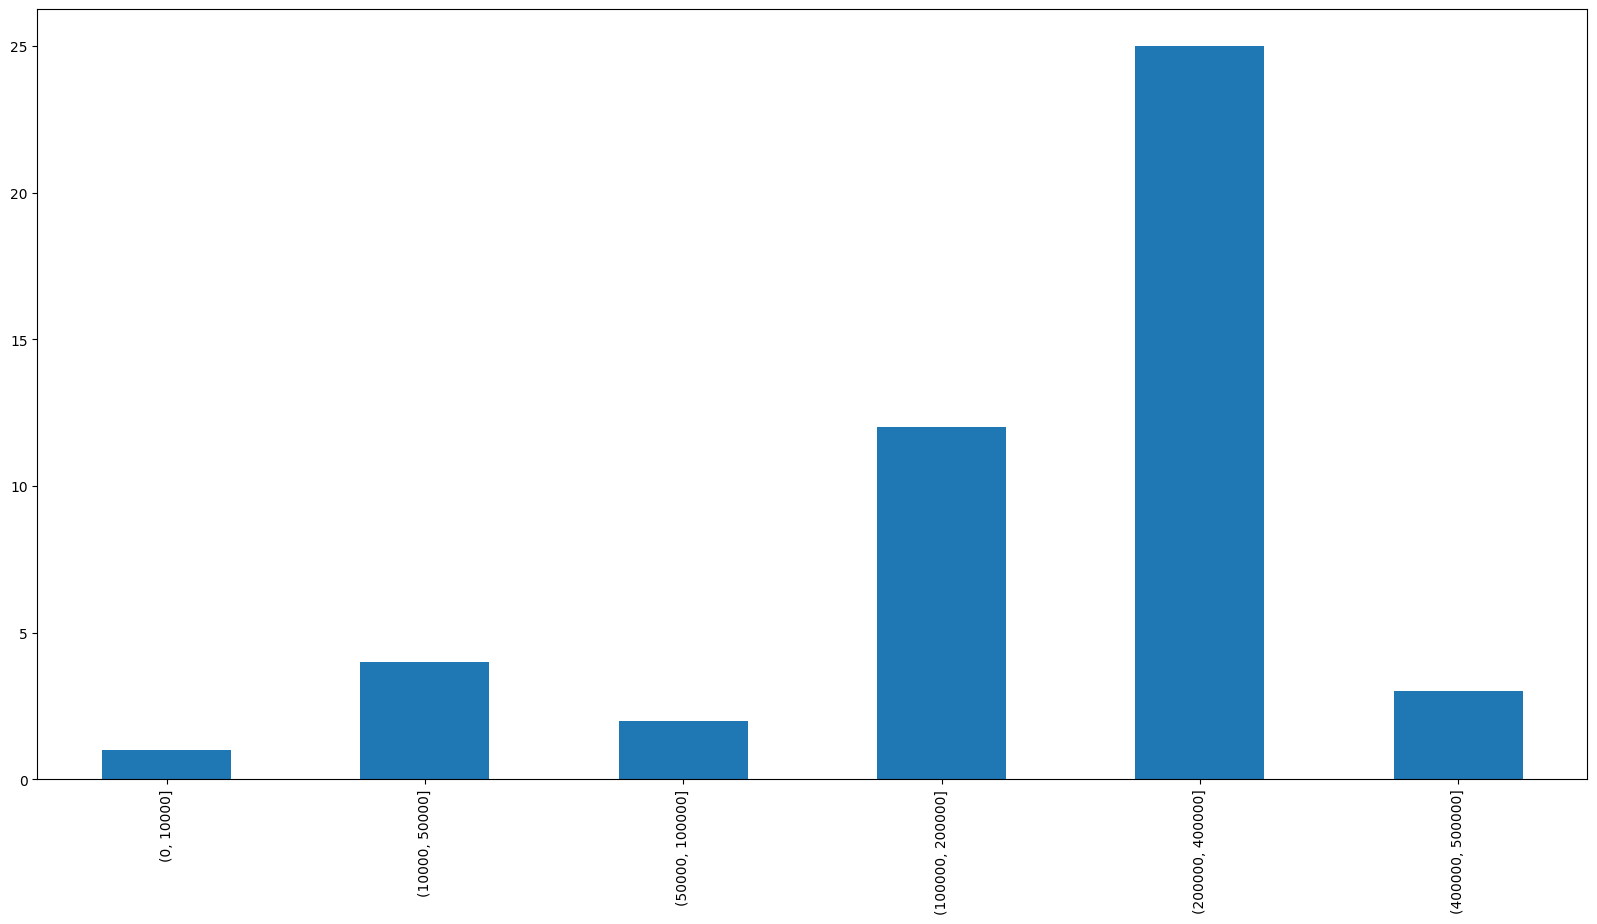

In [121]:
df['mBin'].value_counts().sort_index().plot(kind='bar')

In [122]:
bins = [0, 10000, 50000, 100000, 200000, 400000, 500000]
df['rBin'] = pd.cut(df['R&D Spend'],bins)

<AxesSubplot: >

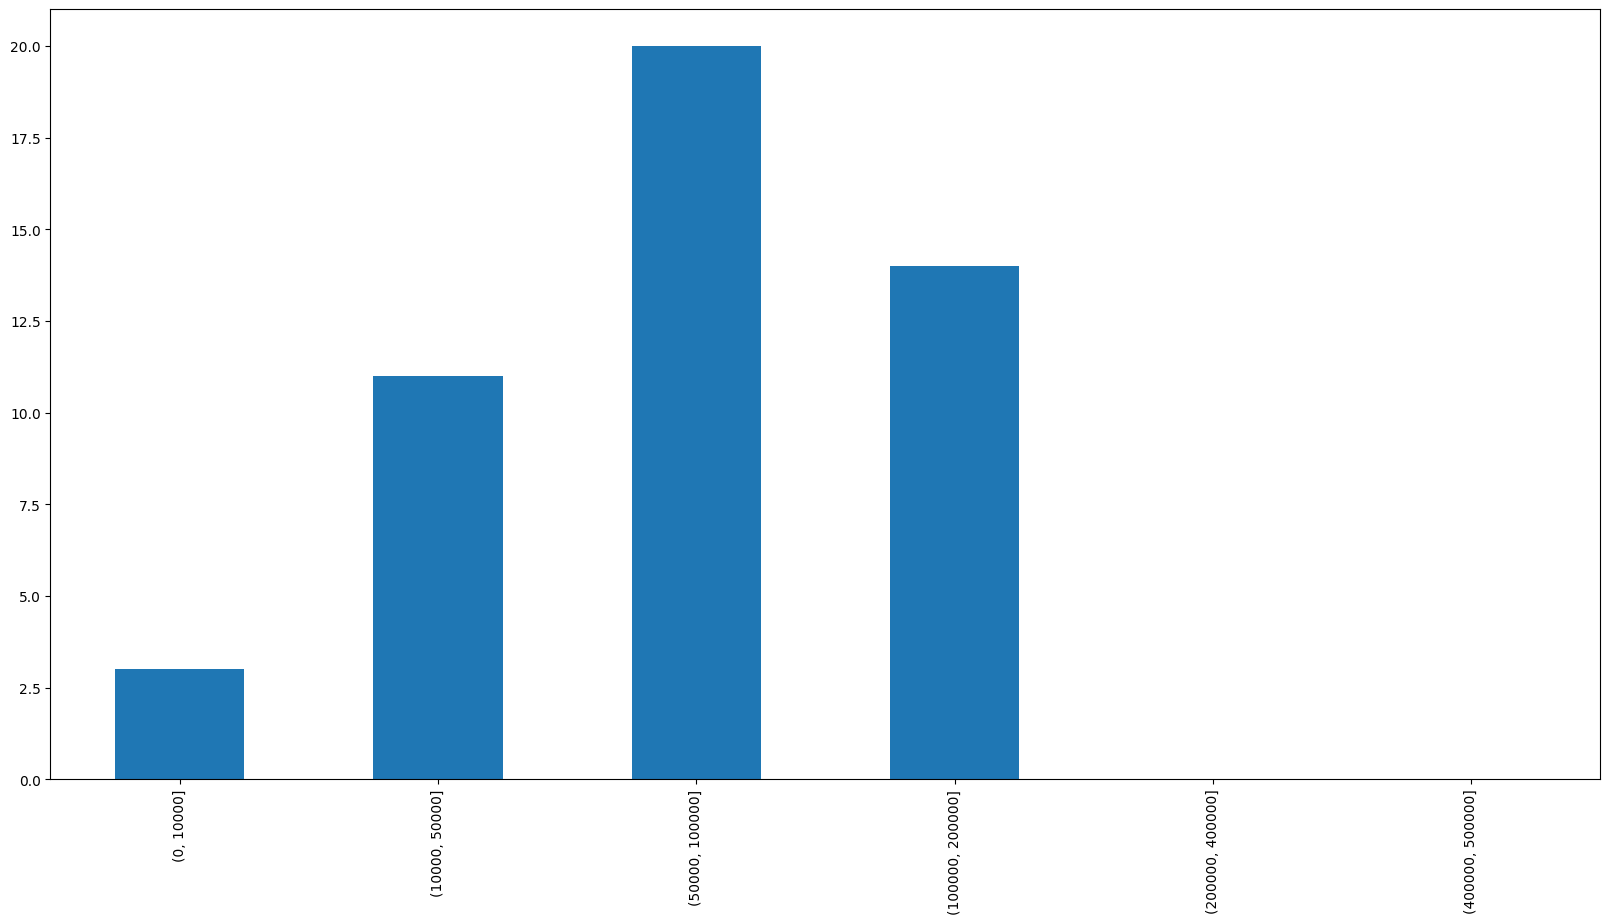

In [123]:
df['rBin'].value_counts().sort_index().plot(kind='bar')

In [4]:
##CHANGING VALUES FOR PROFIT 

df['Profit'] =np.where((df['Profit']<150000),0,df.Profit)
df['Profit'] =np.where((df['Profit']>150000),1,df.Profit)


In [167]:
df.Profit.value_counts()

0.0    41
1.0     9
Name: Profit, dtype: int64

In [5]:
df['Administration'] =np.where((df['Administration']<150000),0,df.Administration)
df['Administration'] =np.where((df['Administration']>150000),1,df.Administration)

In [151]:
df.Administration.value_counts()

0.0    41
1.0     9
Name: Administration, dtype: int64

In [163]:

df['Marketing_Spend'] =np.where((df['Marketing_Spend']<150000),0,df.Marketing_Spend)
df['Marketing_Spend'] =np.where((df['Marketing_Spend']>150000),1,df.Marketing_Spend)

In [164]:
df.Marketing_Spend.value_counts()

1.0    33
0.0    17
Name: Marketing_Spend, dtype: int64

In [6]:
df['R_D_Spend'] =np.where((df['R_D_Spend']<150000),0,df.R_D_Spend)
df['R_D_Spend'] =np.where((df['R_D_Spend']>150000),1,df.R_D_Spend)

In [143]:
df.R_D_Spend.value_counts()

0.0    47
1.0     3
Name: R_D_Spend, dtype: int64

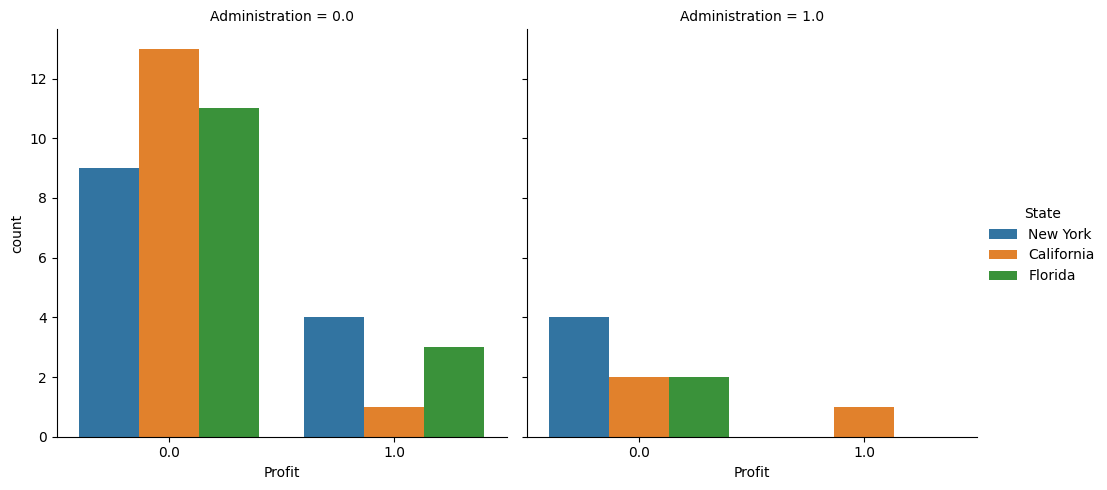

In [114]:
sns.catplot(x='Profit',data=df,hue='State',
            col ='Administration', kind='count')

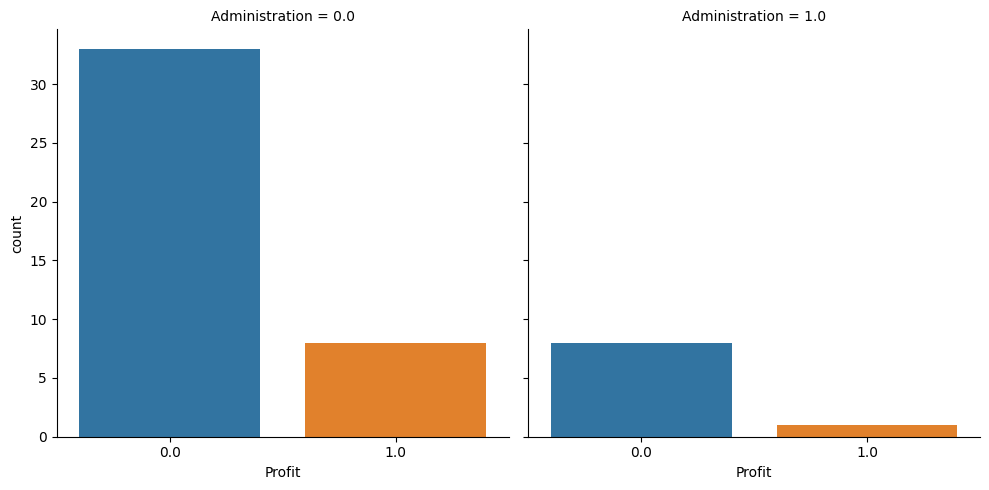

In [154]:
sns.catplot(x='Profit',data=df,
            col ='Administration', kind='count')

<AxesSubplot: xlabel='Profit', ylabel='Administration'>

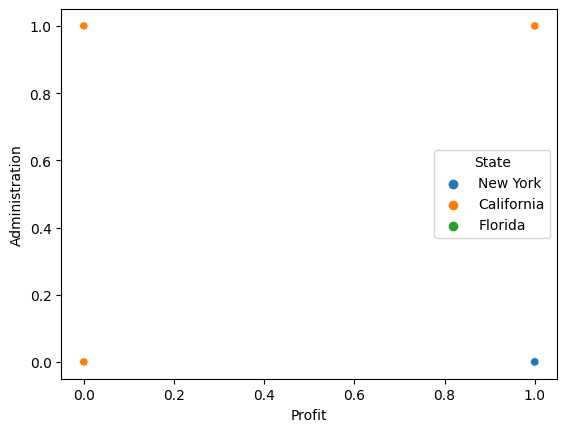

In [116]:
sns.scatterplot(x= df["Profit"], y= df["Administration"], hue= df['State'])

<AxesSubplot: xlabel='Profit', ylabel='Marketing_Spend'>

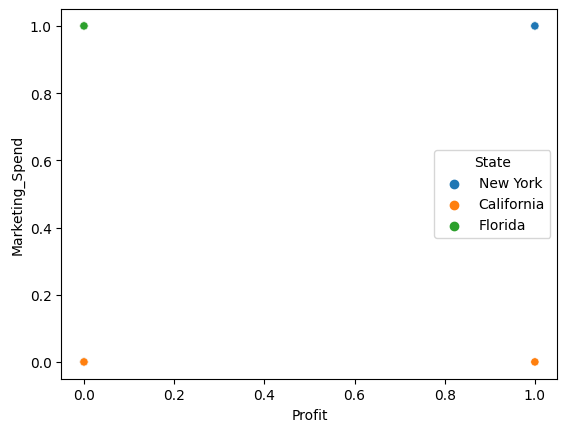

In [169]:
sns.scatterplot(x= df["Profit"], y= df["Marketing_Spend"], hue= df['State'])

<AxesSubplot: xlabel='Profit', ylabel='Marketing_Spend'>

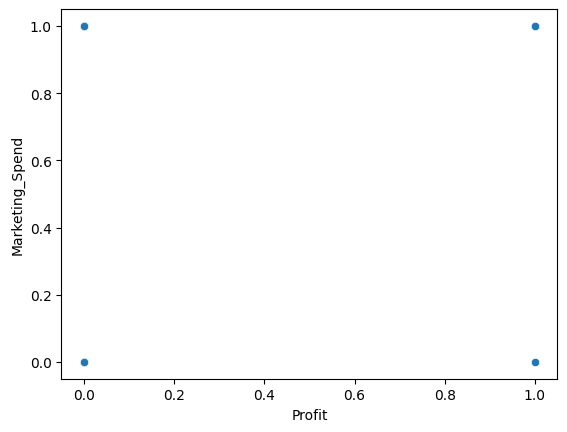

In [170]:
sns.scatterplot(x= df["Profit"], y= df["Marketing_Spend"])

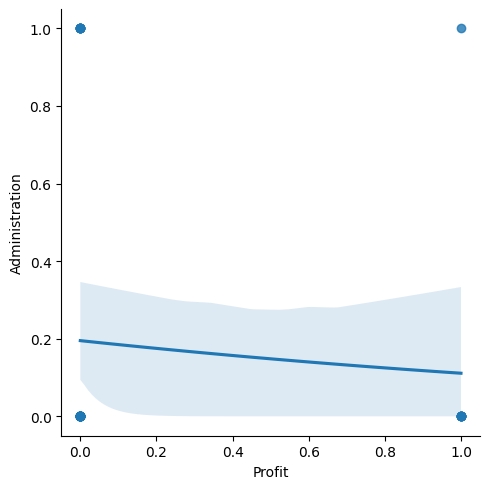

In [155]:
sns.lmplot(x='Profit', y='Administration', data=df, logistic=True, n_boot=100)

<AxesSubplot: xlabel='Profit', ylabel='Administration'>

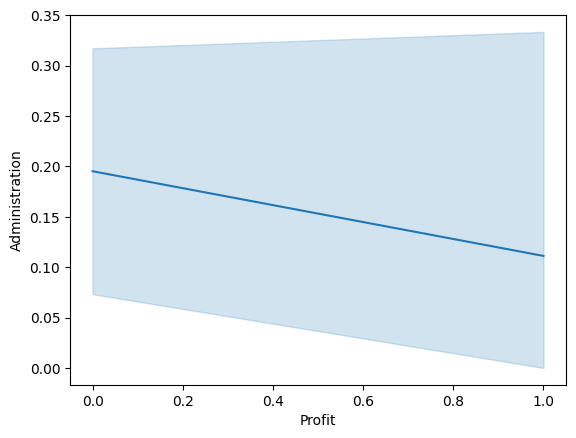

In [156]:
plt.figure()
sns.lineplot(x= df['Profit'], y= df['Administration'])

<AxesSubplot: xlabel='Administration', ylabel='count'>

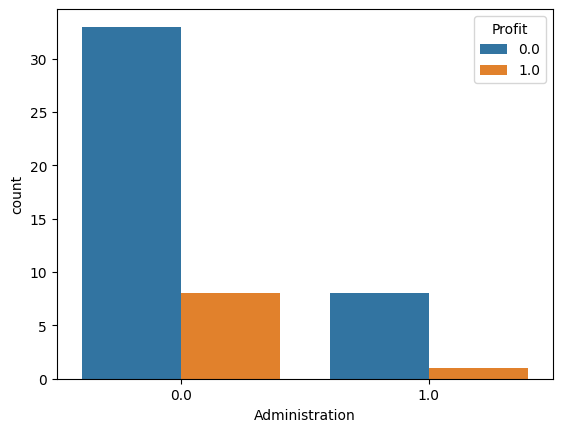

In [118]:
sns.countplot(x='Administration' , data=df, hue='Profit')

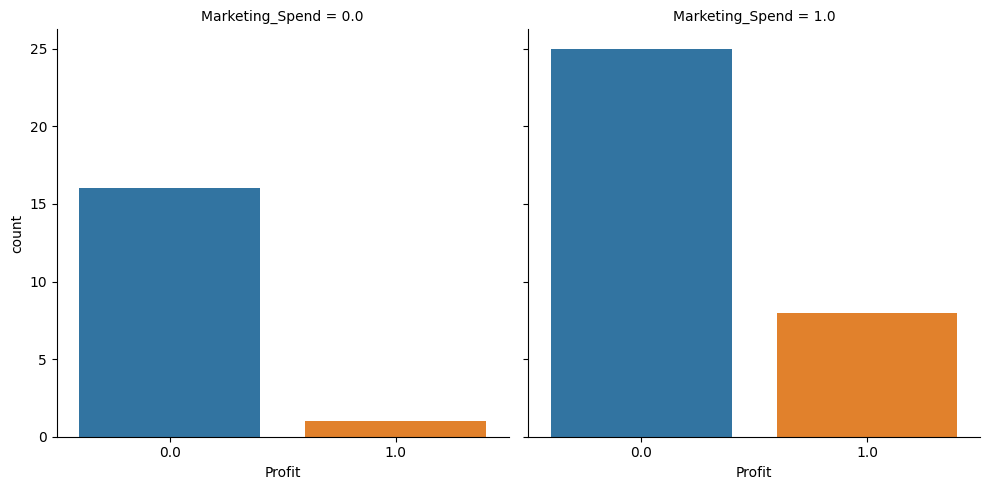

In [119]:
sns.catplot(x='Profit',data=df,
            col ='Marketing_Spend', kind='count')

<AxesSubplot: xlabel='Profit', ylabel='Marketing_Spend'>

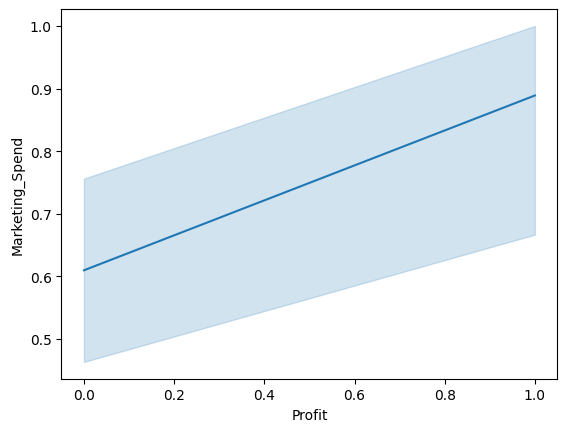

In [168]:
plt.figure()
sns.lineplot(x= df['Profit'], y= df['Marketing_Spend'])

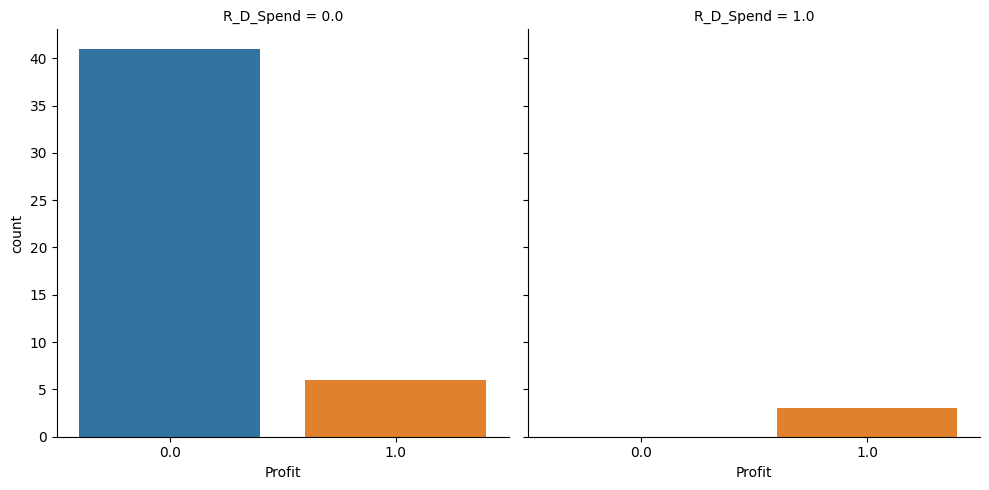

In [147]:
sns.catplot(x='Profit',data=df,
            col ='R_D_Spend', kind='count')

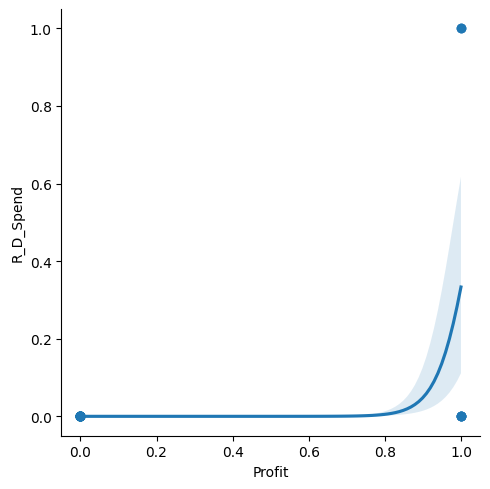

In [148]:
sns.lmplot(x='Profit', y='R_D_Spend', data=df, logistic=True, n_boot=100)

<AxesSubplot: xlabel='Profit', ylabel='R_D_Spend'>

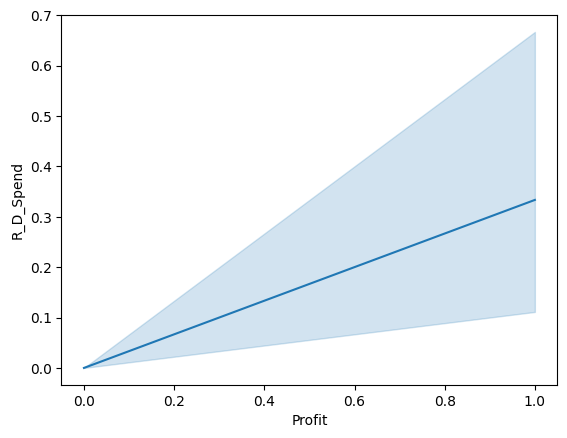

In [149]:
plt.figure()
sns.lineplot(x= df['Profit'], y= df['R_D_Spend'])

<AxesSubplot: xlabel='Profit', ylabel='Marketing_Spend'>

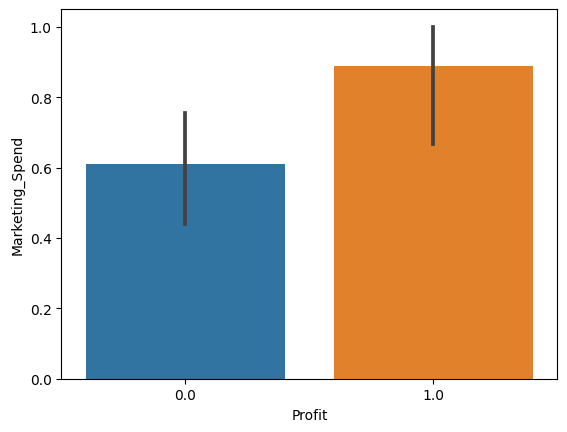

In [173]:
sns.barplot(x='Profit', y='Marketing_Spend', data=df)

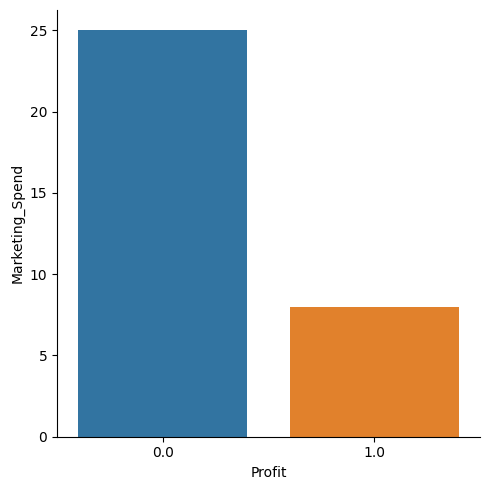

In [178]:
sns.catplot(x='Profit', y='Marketing_Spend',kind='bar', data=df, errorbar=None,estimator=np.sum)

In [14]:
corr_matrix = df.corr()


C:\Users\brill\AppData\Local\Temp\ipykernel_9336\1437168467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

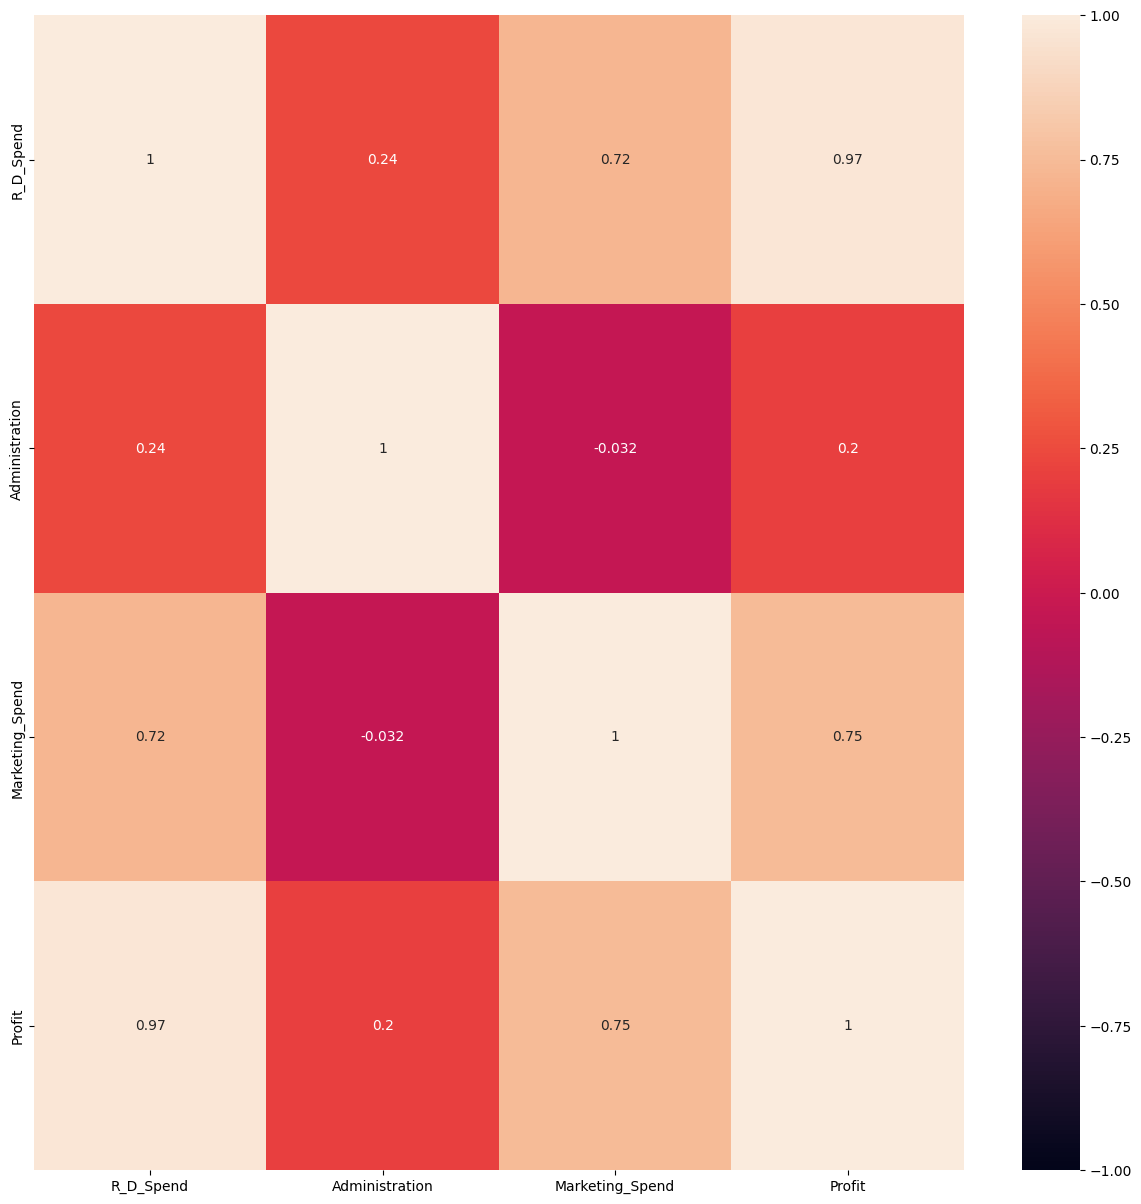

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)

In [121]:
missing= pd.DataFrame(df.isnull().sum().sort_values()).reset_index()
missing.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
missing.head(9)

,col_name,null_count
0,R_D_Spend,0
1,Administration,0
2,Marketing_Spend,0
3,State,0
4,Profit,0


In [214]:
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
 #Use OneHotEncoder directly on the 'State' column
## Trying a different approach to convert text into numbers
#onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid the dummy variable trap
##onehot_encoder = OneHotEncoder(sparse=False, drop=None)
#onehot_encoded = onehot_encoder.fit_transform(df[['State']])

# Add the one-hot encoded columns to the DataFrame
#onehot_columns = [f'onehot_{label}' for label in onehot_encoder.get_feature_names_out(['State'])]
#df[onehot_columns] = onehot_encoded

# Display the DataFrame
#print("Original DataFrame:")
#print(df[['State']])

#print("\nDataFrame with One-Hot Encoded Columns:")
#print(df[onehot_columns])

In [5]:
df.head(2)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [239]:
##Preprocessing 
##preparing the data before splitting
## convert state column into numbers 
#label_encoder=LabelEncoder()

#df['clean_state']= label_encoder.fit_transform(df['clean_state']) 

In [6]:

# separating the data & profit
X = df.drop(columns='Profit', axis=1)
y = df['Profit']

In [7]:
labelencoder = LabelEncoder()
X['State'] = labelencoder.fit_transform(X['State'])
#X=pd.get_dummies(X, drop_first=True)

In [8]:
X

,R_D_Spend,Administration,Marketing_Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [9]:
##split the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 32)## test_size= 0.2

In [10]:
##Useful when Features have different units
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) ### to avoid overfitting we fit and transform x train BUT we always transofrm XTEST.
X_test = scaler.transform(X_test)

In [25]:
joblib.dump(scaler, "scaler_model.pkl")

['scaler_model.pkl']

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
## lINEAR  REGRESSION
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
pred_lin = lin_reg.predict(X_test)

In [15]:
## create a data frame for predictions
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lin})

,Actual,Predicted
49,14681.40,52399.018709
16,126992.93,117443.246634
41,77798.83,75518.564824
35,96479.51,89441.200543
44,65200.33,69259.087767
8,152211.77,149448.403320
31,97483.56,98759.161059
12,141585.52,128464.572104
26,105733.54,111701.334806
2,191050.39,177956.700671


In [16]:
##Measuring Accuracy

print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 9686.603424500656
MSE: 197350803.96258074
RMSE: 14048.16016290321
R2: 0.9104167528122726


In [17]:
testing_data_model_score = lin_reg.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = lin_reg.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9104167528122726
Model Score/Performance on Training data 0.9615356826152189


In [18]:



# Assuming pred_lin and y_test are pandas Series
df = pd.DataFrame({
    "Predicted Value": pd.Series(pred_lin).values.flatten(),
    "Actual Value": pd.Series(y_test).values.flatten()
})

print(df.head())








   Predicted Value  Actual Value
0     52399.018709      14681.40
1    117443.246634     126992.93
2     75518.564824      77798.83
3     89441.200543      96479.51
4     69259.087767      65200.33


<AxesSubplot: title={'center': 'Actual vs Predicted'}, xlabel='Profit', ylabel='Profit'>

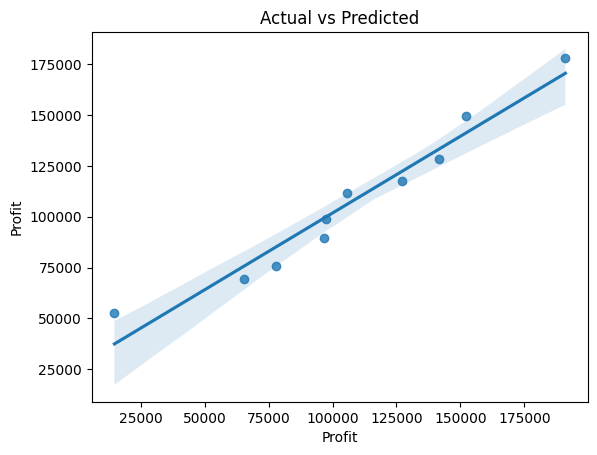

In [19]:
plt.title("Actual vs Predicted")
plt.xlabel("Total cost")
plt.ylabel("Profit")
sns.regplot(x=y_test, y=pred_lin, data=df)

In [20]:
import pickle
namefile='linear_r.pkl'
pickle.dump(lin_reg,open(namefile,'wb'))

In [30]:
## Lasso Regression
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.99)

In [31]:
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})

,Actual,Predicted
49,14681.40,52818.135959
16,126992.93,118049.154957
41,77798.83,74253.427892
35,96479.51,89910.252823
44,65200.33,69698.696826
8,152211.77,150094.323692
31,97483.56,99174.067744
12,141585.52,127290.060812
26,105733.54,110415.688829
2,191050.39,176801.139278


In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 9872.834990444997
MSE: 204702727.41884428
RMSE: 14307.43608823203
R2: 0.9070795017696441


In [32]:
import pickle
namefile='lasso_r.pkl'
pickle.dump(model_lasso,open(namefile,'wb'))

In [18]:
## random forest regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=32)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=32)

In [19]:
rf_reg_pred = rf_reg.predict(X_test)

In [21]:
pd.DataFrame({'Actual': y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
49,14681.40,52426.0247
16,126992.93,114568.2631
41,77798.83,79737.1257
35,96479.51,95268.8699
44,65200.33,70968.0715
8,152211.77,135164.9365
31,97483.56,99593.1538
12,141585.52,133589.9314
26,105733.54,113956.2391
2,191050.39,180985.7374


In [22]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_reg_pred)))
print('R2:', metrics.r2_score(y_test, rf_reg_pred))

MAE: 10452.533650000021
MSE: 214540289.08890018
RMSE: 14647.193898112368
R2: 0.9026139475326306


In [23]:
## Polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_train_2 = poly_reg.fit_transform(X_train)
X_test_2 = poly_reg.transform(X_test)


mul_reg = LinearRegression()
mul_reg.fit(X_train_2, y_train)

LinearRegression()

In [24]:
mul_pred = mul_reg.predict(X_test_2)
pd.DataFrame({'Actual': y_test, 'Predicted': mul_pred})

,Actual,Predicted
49,14681.40,51040.0
16,126992.93,120288.0
41,77798.83,86336.0
35,96479.51,93152.0
44,65200.33,71648.0
8,152211.77,147584.0
31,97483.56,103904.0
12,141585.52,126208.0
26,105733.54,113728.0
2,191050.39,177856.0


In [25]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 10899.045999999998
MSE: 202954166.75833997
RMSE: 14246.198326512937
R2: 0.907873224109394


In [26]:
## ridge regression
model_ridge = Ridge(alpha=0.99, random_state= 32)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.99, random_state=32)

In [27]:
## make predictions
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_ridge})

,Actual,Predicted
49,14681.40,54026.521485
16,126992.93,118362.688704
41,77798.83,74810.826007
35,96479.51,90509.533785
44,65200.33,70524.687528
8,152211.77,149849.471546
31,97483.56,99235.073937
12,141585.52,126815.623805
26,105733.54,109875.064134
2,191050.39,175108.162679


In [28]:
## measuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 10122.51605595713
MSE: 219354213.92626566
RMSE: 14810.611531137587
R2: 0.9004287675891497
